### 목표 : 다중 속성/피처를 기반으로 수치값 예측
-  데이터 : fish.csv
- 피    처 : 4개 Length, Diagonal, Height, Width
- 타    겟 : 수치값 Weight
- 학습 유형 : 지도 학습 + 회귀
- 알고리즘 : 데이터 확인 후 결정

(1) 모듈 로딩 및 데이터 준비 
<hr>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [5]:
# 데이터 준비
data = '../data/fish.csv'

# Bream행만 출력 => 35개 행만 추출
dataDF=pd.read_csv(data, nrows=35, usecols=[1,2,3,4,5])

In [6]:
# 기본 정보
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Weight    35 non-null     int64  
 1   Length    35 non-null     float64
 2   Diagonal  35 non-null     float64
 3   Height    35 non-null     float64
 4   Width     35 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.5 KB


(2) 데이터 확인 
<hr>

- 타겟과 피처의 관계 => 상관계수, 시각화

In [7]:
# 피처와 타겟과의 관계 정도를 시각화 및 수치값으로 표기.
# 행수, 열수, 타겟, 피처리스트.
# 반환 : 없음

def print_feature(nrows, ncols, df, target, features, corrs) : 
    for idx in range(len(features)):
        plt.subplot(nrows, ncols, idx+1)
        plt.scatter(df[target], df[features[idx]], label =f'corr : {corrs[idx]:.2}')
        plt.xlabel(target)
        plt.ylabel(features[idx])
        plt.legend()
    plt.tight_layout() # 간격 안 맞는 거 맞춰주는 건가..?
    plt.show()

In [8]:
dataDF.columns[1:]

Index(['Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [9]:
corrList = dataDF.corr()['Weight'].to_list()

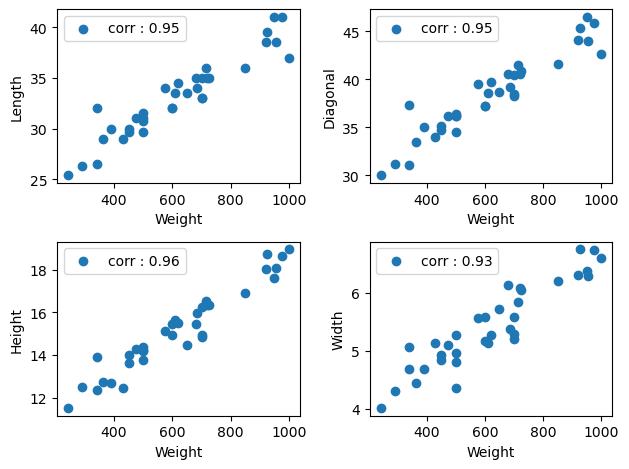

In [10]:
print_feature(2, 2, dataDF, dataDF.columns[0], dataDF.columns[1:], corrList[1:])

(3) 학습 준비 <hr>
 
- 학습 알고리즘 : 양의 선형관계 파악됨 => 선형 모델
- 학습 데이터 준비 : 피처-타겟 분리, 학습용 데이터셋= 테스트용 데이터
- 피처 값의 범위 비교 : 작은 범위 최댓값 8 ~ 큰 범위 최댓값 50 => 피처 스케일링

(3-1) 학습 데이터 분리 => 피처-타겟, 학습용 데이터셋 - 테스트용 데이터셋

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 피처와 타겟 분리
featureDF = dataDF[dataDF.columns[1:]]
featureDF.head(2)

,Length,Diagonal,Height,Width
0,25.4,30.0,11.52,4.0200
1,26.3,31.2,12.48,4.3056


In [12]:
targetDF = dataDF[dataDF.columns[0]]
targetDF.head(2)

0    242
1    290
Name: Weight, dtype: int64

In [13]:
# 데이터셋 준비
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size=0.3, random_state=7)

In [14]:
def print_train_test_data(X_train, X_test, y_train, y_test) :
    print(f'[훈련용] X_train : {X_train.shape}')
    print(X_train.head(2))
    print(f'\n[테스트용] X_test : {X_test.shape}')
    print(X_test.head(2))
    print(f'\n[훈련용] y_train : {y_train.shape}')
    print(y_train.head(2))
    print(f'\n[테스트용] y_test : {y_test.shape}')
    print(y_test.head(2))
print_train_test_data(X_train, X_test, y_train, y_test)

[훈련용] X_train : (24, 4)
    Length  Diagonal   Height   Width
22    34.5      39.7  15.5227  5.2801
17    33.0      38.5  14.9380  5.1975

[테스트용] X_test : (11, 4)
    Length  Diagonal   Height   Width
2     26.5      31.1  12.3778  4.6961
18    33.5      38.6  15.6330  5.1338

[훈련용] y_train : (24,)
22    620
17    700
Name: Weight, dtype: int64

[테스트용] y_test : (11,)
2     340
18    610
Name: Weight, dtype: int64


(3-2) 피처 스케일링 ==> 훈련데이터로 생성

In [15]:
std_scaler = StandardScaler() #이상치의 영향을 많이 받는 단점 ㅇ
std_scaler.fit(X_train)

StandardScaler()

In [16]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_train)

MinMaxScaler()

In [17]:
rb_scaler = RobustScaler() # 중앙값 0, 
rb_scaler.fit(X_train)

RobustScaler()

In [18]:
# 3가지 버전의 스케일된 데이터셋 준비
std_X_train = std_scaler.transform(X_train)
std_X_test = std_scaler.transform(X_test)

minmax_X_train = minmax_scaler.transform(X_train)
minmax_X_test = minmax_scaler.transform(X_test)

rb_X_train = rb_scaler.transform(X_train)
rb_X_test = rb_scaler.transform(X_test)

(4) 학습 진행 <hr>

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()
model.fit(std_X_train, y_train)

print(f'[모델파라미터] ====>\ncoef_: {model.coef_}\nintercept_ : {model.intercept_}') # 피처가 4개기 때문에 model.coef_의 반환값은 4개

[모델파라미터] ====>
coef_: [  5.81124146  56.71151617 108.02781251  28.46942271]
intercept_ : 633.9583333333335


(5) 모델 평가 <hr>
- 훈련용 데이터셋의 점수와 테스트 데이터셋 점수 비교
    * 훈련 점수 > 테스트 점수 : 과대 적합
    * 훈련 점수 ▼ 테스트 점수 ▼ : 과소 적합
    * 훈련 점수 ≒ 테스트 점수 : 최적 적합

In [21]:
train_score = model.score(std_X_train, y_train)
test_score = model.score(std_X_test, y_test)

print(f'Train Score : {train_score} --- Test Score : {test_score}')

Train Score : 0.9546390373777777 --- Test Score : 0.9064944670000151


In [22]:
def scaler_score(n, modelname, scaled_x_train, scaled_x_test, name) :
    train_scoreList =[]
    test_scoreList =[]
    for i in range(n) :
        model = modelname()
        model.fit(scaled_x_train, y_train)
        train_score = model.score(scaled_x_train, y_train)
        test_score = model.score(scaled_x_test, y_test)
        train_scoreList.append(train_score)
        test_scoreList.append(test_score)

    print(f'[{name} 모델파라미터] ====>\ncoef_: {model.coef_}\nintercept_ : {model.intercept_}')
    print(f'Train Score{i+1} : {train_score} --- Test Score{i+1} : {test_score}\n')
    print(f'max train score : {max(train_scoreList)} --- max test Score : {max(test_scoreList)}')
    print(f'min train score : {min(train_scoreList)} --- min test Score : {min(test_scoreList)}\n')

In [23]:
scaler_score(35, LinearRegression, std_X_train, std_X_test, 'std')
print()
scaler_score(35, LinearRegression, minmax_X_train, minmax_X_test, 'minmax')
print()
scaler_score(35, LinearRegression, rb_X_train, rb_X_test, 'robust')

[std 모델파라미터] ====>
coef_: [  5.81124146  56.71151617 108.02781251  28.46942271]
intercept_ : 633.9583333333335
Train Score35 : 0.9546390373777777 --- Test Score35 : 0.9064944670000151

max train score : 0.9546390373777777 --- max test Score : 0.9064944670000151
min train score : 0.9546390373777777 --- min test Score : 0.9064944670000151


[minmax 모델파라미터] ====>
coef_: [ 24.4510372  237.85530063 421.56213804 107.59527035]
intercept_ : 233.29753954443743
Train Score35 : 0.9546390373777777 --- Test Score35 : 0.9064944670000149

max train score : 0.9546390373777777 --- max test Score : 0.9064944670000149
min train score : 0.9546390373777777 --- min test Score : 0.9064944670000149


[robust 모델파라미터] ====>
coef_: [  6.66134026  68.47349563 126.10019259  41.85970066]
intercept_ : 613.6037101327802
Train Score35 : 0.9546390373777777 --- Test Score35 : 0.9064944670000151

max train score : 0.9546390373777777 --- max test Score : 0.9064944670000151
min train score : 0.9546390373777777 --- min test